# Programming Assignment \# 1
Student Name:**Nicolas Mavromatis, nima6629@colorado.edu**</br>
__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#This is similar to selection sort. 
def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [2]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

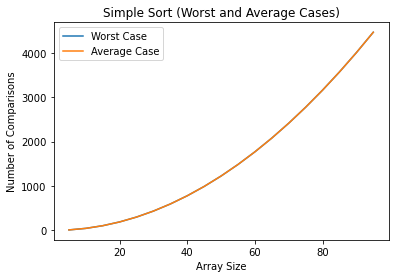

In [3]:
import random
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [4]:
# Implement code to bubble sort the given array a in place.
# Also return the number of comparisons. 
def bubble_sort(a):
    num_compares=0
    n=len(a)
    #repeatedly swaps adjacent elements if in wrong order.
    #only need n-1 total comparisons
    #note that j+1 is accessed, so we don't need to go to end of array in for loops. 
    for i in range(0, n-1):
        swapped=False
        for j in range(0, (n-i-1)):
            num_compares = num_compares + 1
            if a[j]>a[j+1]:
                #if adj values out of order, swap. KEY: j and j+1, no accessing i directly
                a[j], a[j+1]=a[j+1], a[j]
                swapped=True
        #if a value is not swapped, it means list is sorted and sorting is done.
        #proceed to return statement.
        if swapped==False: #don't forget ==
            break
    #print(num_compares)
    return num_compares
                       

### Complexity Analysis of Bubble Sort


This Bubble sort routine is the optimized version that checks in the inner loop whether a swap is done.  
If no swap is necessary, this means the list is already in order.  
"Swapped" becomes "False", and the outer loop is broken out of, so that no more comparisons are done.  

Bubble sort has an average complexity of $\Theta(N^{2})$ and worst case complexity of $\Theta(N^{2})$ comparisons.  
The worst case input is crafted in strictly descending order, which was produced by altering the "create_ascending_sorted_array"  
function into the "create_descending_array()" by inserting each value at the front of the linked list,  
instead of appending to the back. 

In both the average (random) and worst cases, roughly the same number of comparsions are done.  
The outer loop runs (n-1) times, and the inner loop runs ((n-i-1)) times, simplifying to $\Theta(N^{2})$.  
So the number of comparisons in the worst vs. the average case are not different.  

However, in the best case, where the list is already in ascending sorted order, the number of comparisons is  $\Theta(N)$,  
because the algorithm detects when the list is sorted (with bool swapped) and stops making comparisons.  



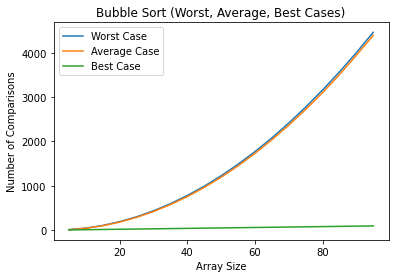

In [5]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

#My own custom code for creating WC descending arrays
def create_descending_array(a_size):
    a = []
    for i in range(a_size):
        a.insert(0,i)
    return a


# Code for creating an already sorted array (BC)
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_descending_array(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
#for i in num_compares_wc:
   # print("WC=", i)
    
#MY Custom code for best case
num_compares_bc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = bubble_sort(a)
    num_compares_bc.append(nc)
#for i in num_compares_bc:
    #print("BC=", i)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total = total + nc
    avg = total // num_trials
    num_compares_random.append(avg)
#for i in num_compares_random:
    #print("RAND=", i)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.plot(array_sizes, num_compares_bc, label='Best Case')
plt.legend(['Worst Case', 'Average Case', 'Best Case'])
plt.title('Bubble Sort (Worst, Average, Best Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [6]:
# Implement the code for merge sort

# Be careful in counting number of comparisons since you should include comparisons in the merge part.
# Also: code needs to sort the array a. You may have to copy things over from a temp array back into a.

def merge(left, right, a):
        global num_compares
        
        i=0 #idx for left
        j=0 #idx for right
        k=0 #idx for a
        #sort each half, copying back into original array a
        while i<len(left) and j<len(right):
            num_compares = num_compares + 1
            if left[i]<right[j]:
                a[k]=left[i]
                i=i+1
                k=k+1
            else:
                a[k]=right[j]
                j=j+1
                k=k+1
        #sort remaining elements of one list. only one while loop will run.
        
        while i<len(left):
            a[k]=left[i]
            i=i+1
            k=k+1
        while j<len(right):
            a[k]=right[j]
            j=j+1
            k=k+1
        #Not necessary to ret num_compares, it is global    
        return #num_compares

def merge_sort2(a):
    #must include line below to update global var
    global num_compares
    #base case, is when len(a)==1
    n=len(a)
    #not base case
    
    if n>1:
        #find mid point
        mid=n//2
        #divide array in halves using slices
        left=a[:mid] #does not include mid
        right=a[mid:] #includes mid
        #recursively call on left and right halves
        merge_sort2(left)
        merge_sort2(right)
        #merge two together into a, sorting in process
        merge(left, right, a)
    #Not necessary to ret num_compares, it is global     
    return #num_compares
    
    
    #This calls helper functions, which is easiest to update and return global var
def merge_sort(a):
    global num_compares
    num_compares=0
    merge_sort2(a)
    return num_compares
    


### Complexity Analysis of Merge Sort


Inputs for the worst case are when the left and right sub arrays have the max number of comparisons in merge(),  
so the max number of comparisons are done in the loop:  
"while i<len(left) and j<len(right):".  
This happens when alternating elements are stored in each half of the split array (the left and right subarrays) 

Here is a recursive example of the worst input  (in range 5):  
(original arr) A=[0,1,2,3,4]  
L1=[0,2,4], R1=[1,3]  
L2=[0,4], R2=[2]  
If only two elements, swap them then merge sublists (in reverse recursive order):  
(W.C. input) A=[4,0,2,3,1]  

This worst case input function works as follows:  
First the function split() is passed an array in ascending order.  
If the array has only 1 or 0 elements (base case 1), then this array is returned.  
If the array has 2 elements (base case 2), then they are swapped, then arr is returned.  
Else, the arrays are split into left and right halves with alternating elements in each.  
Recursive calls are made on each of the left and right halves,  
then they are merged back together in a simple merge() function.  
This ensures that the worst case input will be created.  
Sure enough, the worst case takes slightly more operations than the average (though both are $\Theta(NLogN)$.


Both the average and worst cases are $\Theta(NLogN)$ comparisons.  

Merge_sort() splits the input in half, until the input size is only one, which is done in $Log_{2}N+1$ levels.  
At each stage, there are a max of (N//2) comparisons, and the merge function can be done in $\Theta(N)$,  
yielding: $T(N)=N/2(Log_{2}N+1)+N$ which can be simplified to just $\Theta(NLogN)$.  


Here is another derivation of merge sort's complexity:  
The recurrence for M.S. is T(n) = 2T(n/2) + n. Each recursive call divides the problem into 2 subproblems of size  (N/2),  
and merging is done in linear time. Applying Case 2 of the Master Theoerem, for MS,  
the worst case complexity is $\Theta(NLogN)$.  

Thus, there is no significant difference in bounding the number of comparisons between the worst and average cases,  
(although in practice the worst case takes slightly more operations).  




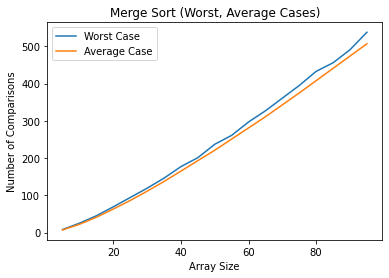

In [7]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
import random
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

#My own custom code for creating WC arrays
#Functions to generate worst case input for merge sort, 
#which happens when alternating elements are stored in each half, left and right,
#so max number of comparisons are done in the loop:
# while i<len(left) and j<len(right):
#Here is a recursive example of worst input:
#I.E. (in range 5)
#A=[0,1,2,3,4]
#L1=[0,2,4], #R1=[1,3]
#L2=[0,4], #R2=[2]
#If only two elements, swap them then merge sublists (in reverse recursive order):
#A=[4,0,2,3,1]

#merge left and right halves back into arr
def merge2(left, right):
        arr=left[:]+right[:]
        return arr

#pass a sorting array, split into two alternating halves recursively and scramble into worst case
def split(arr): 
    #base case 1, just return arr if only 1 element
    if len(arr)<=1:
        return arr
    #base case 2, swap elements in arr if only 2 elments. Responsible for "scramble" into WC input
    if len(arr)==2:
        arr[0], arr[1]=arr[1], arr[0]
        return arr
            
    #create left and right halves to split array
    left=[]
    right=[]
    #store evens in left
    for i in range(0, len(arr), 2):
        left.append(arr[i])
    #store odds in right                   
    for i in range (1, len(arr), 2):
        #Storing alternate elements in right subarray
        right.append(arr[i])
    #recursively split left and right halves, then merge back together       
    left=split(left)
    right=split(right)
    arr=merge2(left, right)
    return arr

def genWorst(asize):
    L=[]
    for i in range(asize):
        L.append(i)
    L=split(L)
    return L


# Code for creating an already sorted array (BC)
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a =  genWorst(n)
    nc = merge_sort(a)
    num_compares_wc.append(nc)
#for i in num_compares_wc:
    #print("WC=", i)
    
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = merge_sort(a)
        total = total + nc
    avg = total // num_trials
    num_compares_random.append(avg)
#for i in num_compares_random:
   # print("RAND=", i)
    
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Average Case')
plt.plot(array_sizes, num_compares_random, label='Worst Case')
#plt.plot(array_sizes, num_compares_bc, label='Best Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst, Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Quick Sort


In [8]:
# Implement code for quick sort
# Must sort the array a in place
# Must return the number of comparisons



def partition(A, low, high):
    #to access value of global var inside function, this line is necessary:
    global num_compares
    #i+1 is always next index to place values in R1, where values < pivot. 
    #R2 has values >= pivot,
    #R3 has values unprocessed
    
    #always initialize i to (low-1)! KEY!!
    i=low-1
    p=A[high] #always select last value as pivot
    #j is idx of unprocessed value
    for j in range (low, high):
        num_compares+=1
        if A[j]<p:
            #increment i so that it A[i] swapped with A[j], adding to R1
            i=i+1
            #swap em
            A[i], A[j] = A[j], A[i]
        #else, j is automatically incremented by for loop, extending R2
    #finally, place pivot in correct location by swapping, return its index
    A[i+1], A[high]= A[high], A[i+1]
    #i+1 Is KEY
    return i+1
#must define helper, as quick_sort only passed 1 arg
def quick_sort_help(A, low, high):
    global num_compares
     #base case
    if len(A)==1:
        return num_compares
    
    if low<high: #sorting still to be done
        #num_compares = num_compares + 1
    #call partition, returning index that list is partitioned around
        p=partition(A, low, high)
        #recursively quicksort Left and Right halves, excluding p(pivot idx)
        quick_sort_help(A, low, p-1)
        quick_sort_help(A, p+1, high)
        #global var. not necessary to return.
    return #num_compares
        
def quick_sort(A):
    #define a global variable, updated unilaterally by recursive functions.
    global num_compares
    #initialize global variable
    num_compares=0
    quick_sort_help(A, 0, len(A)-1)
    #print(num_compares)
    return num_compares
    
   

### Complexity Analysis of Quick Sort

The worst case input is when the input is in strictly descending order,  
because the partition is as unbalanced as possible with every value being placed to the left of the partition.  
In this implementation, the partition is always the last value of the list, leading to this imbalance of partitions.  

This function has the most variance so far in average and worst case comparison number.  

In the worst case, the number of comparisons is $\Theta(N^{2})$.  
The partitions are extremely uneven, with one containing 0 elements,  
and the other containing n-1 elements.  
Similar to merge sort, a recursive call on a subarray of n elements is done in $\Theta(N)$ time.  
The total partitioning time for two unbalanced partitions is given by the sum,  
equal to  $c((n+1)(n/2)-1)$, which simplifies to $\Theta(N^{2})$ comparisons.  


In the average case, the number of comparisons is $\Theta(NLogN)$.  
Similar to merge sort, if the partitions are roughly even in the random case,  
then the number of levels needed to reach 1 element is $\Theta(Log_{2}N+1)$, with N recursive calls,  
simplifying to $\Theta(NLogN)$.

Here is another derivation of quick sort's average complexity:  
The recurrence for Q.S. is T(n) = 2T(n/2) + n.  
Assuming the partition selection creates roughly balanced sub lists,  
each recursive call divides the problem into 2 subproblems of size  (N/2),  
Applying Case 2 of the Master Theoerem, for QS,  
the average complexity is $\Theta(NLogN)$.  

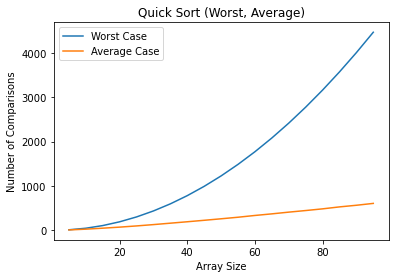

In [9]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them
import random
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

#My own custom code for creating WC descending arrays
def create_descending_array(a_size):
    a = []
    for i in range(a_size):
        a.insert(0,i)
    return a

# Code for creating an already sorted array (BC)
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_descending_array(n)
    nc = quick_sort(a)
    num_compares_wc.append(nc)
#for i in num_compares_wc:
    #print("WC=", i)
    
#MY Custom code for best case
num_compares_bc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = quick_sort(a)
    num_compares_bc.append(nc)
#for i in num_compares_bc:
    #print("BC=", i)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
    avg = total // num_trials
    num_compares_random.append(avg)
#for i in num_compares_random:
    #print("RAND=", i)
    
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
#plt.plot(array_sizes, num_compares_bc, label='Best Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Quick Sort (Worst, Average)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

-----
## Testing Code: Do not edit



In [10]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [11]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [12]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [13]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [14]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
